<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/Handwritten%20Digit%20Recognition%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITLE: Handwritten Digit Recognition using Random Forest Classifier

OBJECTIVE:  The objective of this project is to build a machine learning model for recognizing handwritten digits using the Random Forest Classifier algorithm. The model will be trained on the digits dataset and evaluated on a test set.

DATA SOURCE: The digits dataset is a built-in dataset in scikit-learn, which contains 1,797 images of handwritten digits (0-9). Each image is 8x8 pixels in size.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#DATA SOURCE
from sklearn.datasets import load_digits

In [4]:
df = load_digits()

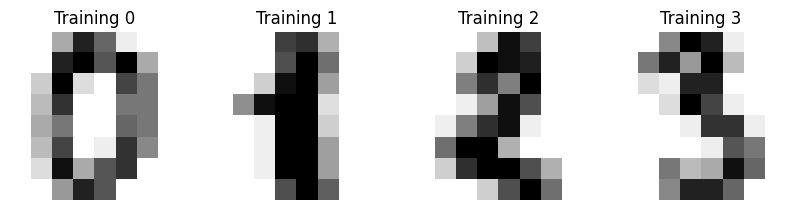

In [5]:
#VISUALIZATION
_, axes = plt.subplots(nrows=1, ncols=4,figsize=(10,3))
for ax,image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training %i" % label)

In [7]:
### Explore Data
# Print the description of the dataset
print(df.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [8]:
#PREPROCESSING
#flatten the image
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [12]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

In [15]:
data = data / 16


In [17]:
# Set the target variable (y) as the digits
y = df.target


In [18]:
# train test split data
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(data, df.target, test_size=0.3)
x_train.shape,x_test.shape, y_train.shape,y_test.shape


((1257, 64), (540, 64), (1257,), (540,))

In [19]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
RandomForestClassifier()

RandomForestClassifier()

In [20]:
#Evaluation and prediction
y_pred = rf.predict(x_test)

In [21]:
y_pred

array([8, 2, 3, 9, 8, 1, 9, 5, 4, 8, 9, 2, 0, 3, 1, 5, 7, 4, 3, 2, 4, 1,
       8, 3, 8, 4, 6, 0, 1, 0, 5, 4, 2, 5, 1, 1, 2, 3, 9, 7, 2, 7, 1, 0,
       1, 7, 5, 1, 6, 2, 7, 6, 7, 6, 4, 4, 7, 5, 1, 6, 4, 3, 4, 4, 4, 7,
       1, 3, 8, 4, 0, 8, 2, 7, 0, 1, 9, 9, 7, 4, 4, 1, 1, 1, 5, 3, 6, 6,
       1, 7, 4, 1, 7, 9, 2, 3, 1, 6, 8, 9, 0, 4, 4, 1, 7, 2, 1, 4, 1, 6,
       0, 4, 3, 5, 7, 3, 1, 1, 9, 0, 4, 0, 3, 2, 5, 0, 3, 7, 9, 2, 8, 3,
       6, 3, 7, 1, 0, 8, 8, 0, 4, 1, 9, 6, 5, 8, 8, 2, 6, 6, 0, 0, 5, 4,
       2, 7, 6, 4, 0, 6, 9, 3, 6, 8, 5, 9, 1, 9, 0, 2, 0, 3, 6, 9, 0, 4,
       7, 7, 4, 6, 3, 3, 8, 0, 9, 9, 2, 1, 1, 7, 9, 9, 3, 1, 1, 6, 5, 4,
       0, 4, 9, 9, 3, 9, 7, 1, 0, 6, 4, 4, 0, 9, 8, 7, 9, 6, 0, 8, 8, 4,
       3, 5, 6, 8, 9, 7, 3, 8, 4, 7, 8, 0, 6, 1, 4, 2, 8, 8, 9, 7, 0, 7,
       6, 7, 2, 3, 8, 7, 5, 1, 0, 4, 6, 3, 6, 8, 8, 4, 5, 3, 6, 8, 6, 6,
       7, 6, 6, 5, 2, 7, 8, 5, 8, 0, 5, 3, 1, 6, 7, 9, 5, 3, 4, 4, 2, 7,
       6, 1, 7, 1, 7, 2, 8, 2, 5, 2, 1, 6, 4, 7, 7,

In [22]:
#Accuracy
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 45,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 57,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 47,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 58]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.95      1.00      0.97        57
           2       1.00      0.98      0.99        50
           3       0.98      1.00      0.99        51
           4       0.96      0.98      0.97        56
           5       0.98      0.96      0.97        47
           6       1.00      0.97      0.98        58
           7       0.98      1.00      0.99        57
           8       0.94      0.92      0.93        51
           9       0.98      0.97      0.97        60

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



#EXPLANATION: The code above demonstrates the process of building a machine learning model for handwritten digit recognition using the Random Forest Classifier algorithm. It includes steps for loading the data, exploring the dataset, preprocessing the data, splitting the data into training and testing sets, training the model, evaluating its performance, and making predictions on new data.